## Exemple Matlab : Systèmes BICM
------------------------------------

### 1. Démodulation souple
-----------------------------------------------------------------------------
Soit  $\textbf{x}[n]=[x_1[n] \cdots x_m[n]]$ le vecteur binaire de $m$ bits correspondant à l'étiquetage du symbole $s[n]$ d'une constellation $M$-aire $\mathcal{S},$ le log-rapport de probabilité est alors donné par

$$
\begin{aligned}
L(x_i[n])&=  \log{\left( \frac{p(x_i[n]=0\mid y[n])}{p(x_i[n]=1\mid y[n])}\right)}\nonumber \\
&=  \log{\left( \frac{\sum_{s[n] \in \mathcal{S}_0^i}{p(y[n]|s[n])p(s[n])}}{\sum_{s[n] \in \mathcal{S}_1^i}{p(y[n]|s[n])p(s[n])}} \right)}
\end{aligned}
$$

où $\mathcal{S}_0^i\subset \mathcal{S}$ (resp. $\mathcal{S}_1^i$) est le sous ensemble des symboles $s \in \mathcal{S}$ tels que le $i$-ième bit $x_i[n]$ du vecteur $x[n],$ tel que $s[n]=\mathcal{}$ est le bit $'0'$ (resp. le $i$-ième bit $x_i[n]$ du vecteur $x[n]$ est le bit $'1'$). $p(s[n])$ est la probabilité a priori de $s[n]$ qui sera considéré comme uniforme pour la plupart des cas d'intérêt.



PYX =

    0.0000    0.0000    0.0000    0.0000    0.0000    0.2226    0.0241    0.0000    0.0000    0.0000
    0.0001    0.0000    0.0000    0.0000    0.0000    0.5733    0.0001    0.0000    0.0000    0.0000
    0.0000    0.0000    0.5943    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
    0.0000    0.0000    0.0962    0.0000    0.0000    0.0007    0.0000    0.0000    0.0000    0.0000
    0.0424    0.0000    0.0000    0.0000    0.0000    0.0028    0.7619    0.0000    0.0000    0.0000
    0.2970    0.0000    0.0000    0.0000    0.0000    0.0073    0.0023    0.0000    0.0000    0.0000
    0.0000    0.0000    0.0984    0.0071    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
    0.0010    0.0000    0.0159    0.0141    0.0000    0.0000    0.0000    0.0000    0.0002    0.0001
    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.3149    0.0000    0.0000
    0.0002    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0163   

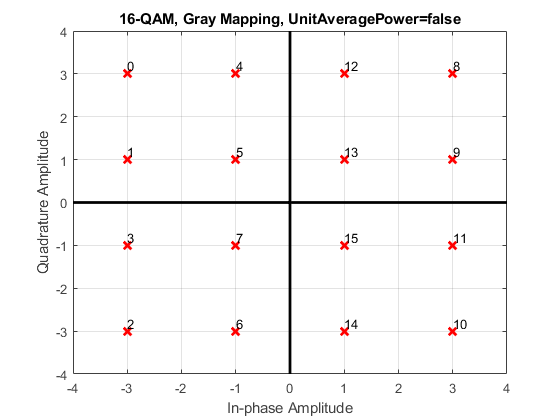

In [1]:
Ns= 10;                  % Number of Symbols 
Es_N0_dB = 10;

%loop for order M
M = [16];                     % Constellation Order
Constellation=qammod((0:M-1)',M,'PlotConstellation', true);
BinaryTable=de2bi((0:M-1)','left-msb');
% Loop variable for SNR
% Monte carlo parameter
    
%generate M-QAM modulation
    
    s = randi([0 M-1],1,Ns);
    x = qammod(s, M);
    
    Es_N0=10^(Es_N0_dB/10);%normal
    sigx2=var(x);
    N0  = sigx2 /(Es_N0);
    
    %add noise
    noise_  = sqrt(N0/2 )*randn(1,length(x))+ ...
                1j*sqrt(N0/2 )*randn(1,length(x));
    sig_rx  =  x + noise_ ;
    
    %compute likelihood
    xref=repmat(Constellation,1,Ns);       %
    d2=-abs((repmat(sig_rx,M,1)-xref)).^2/N0;
    PYX=exp(d2)
    %LLRs without a priori
    LLRs=log((1-BinaryTable')*PYX)-log(BinaryTable'*PYX)
    
    %Hard decisions
    bhat=(1-sign(LLRs))/2
    
    %bits
    bits=de2bi(s,'left-msb')'

### 2. Capacité BICM
---------------------------------------------

$$C_{\mathrm{bicm}}=m-\frac{1}{2}\sum_{k=0}^{m-1}\sum_{c=0}^{1}{\mathbb{E}\left( \log_2{\left(\frac{\sum_{s_i \in \mathcal{S}}{p(y|s_i)}}{\sum_{s_j \in \mathcal{S}_c^k}{p(y|s_j)}} \right)}\right)}$$

On peut montrer la formule suivante, plus commode à utiliser et interpréter :

$$C_{\mathrm{bicm}}=\sum_{k=1}^m I({X_k},{Y}) \leq C_{AWGN},$$

où $I({X_k},{Y})=1-\mathbb{E}_{X_k,Y}{(\log_2(1+e^{-(1-2 X_k)L(X_k)}))}.$ $I({X_k},{Y})$ est la capacité binaire associée au canal $k$. Notons également que $L(X_k)$ est une fonction implicite de $Y.$ A partir de ces expressions, on peut alors facilement calculer une estimée

 $$\hat{I}({X_k},{Y})=1-\frac{1}{N_k} \sum_n{(\log_2(1+e^{-(1-2 x_k[n])L(x_k[n])}))}.$$

En général pour les modulations linéaires, le mapping de Gray permet d'être quasi-optimal pour les efficacités moyennes à grandes.


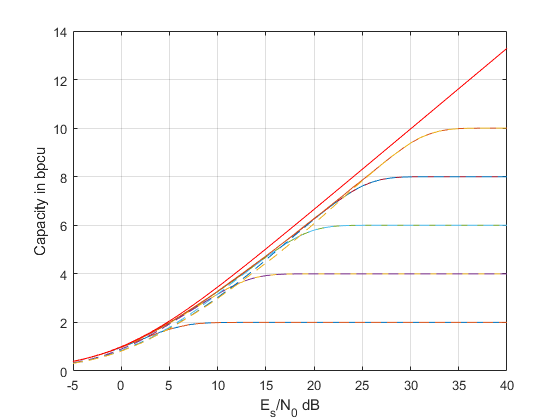

In [2]:
% Simulation parameters
Ns= 100000;                  % Number of Symbols 
Es_N0_dB =  (-5:40);

%loop for order M
for M = [4 16 64 256 1024];                     % Constellation Order
Constellation=qammod((0:M-1)',M);
BinaryTable=de2bi((0:M-1)','left-msb');
% Loop variable for SNR
% Monte carlo parameter
    
for snr=1:numel(Es_N0_dB)
    %generate M-QAM modulation
    
    s = randi([0 M-1],Ns,1);
    x = qammod(s, M);
    
    Es_N0=10^(Es_N0_dB(snr)/10);%normal
    sigx2=var(x);
    N0  = sigx2 /(Es_N0);
    
    %add noise
    noise_  = sqrt(N0/2 )*randn(length(x),1)+ ...
                1j*sqrt(N0/2 )*randn(length(x),1);
    sig_rx  =  x + noise_ ;
    
    %Compute Capacity
    %%Entropy
    Hx=log2(M);
    %%Conditionnal Entropy
    xref=repmat(Constellation,1,Ns);       %
    d2=-abs((repmat(sig_rx,1,M).'-xref)).^2/N0;
    PYX=exp(d2);
    PYx=exp(-abs((sig_rx-Constellation(s+1))).^2/N0);
    PxY=PYx./(sum(PYX)');
    HXY=-mean(log2(PxY'));
    ConstrainedCapacity(snr)=Hx-HXY;
    
    %Binary Capacity
    LLRs=log((1-BinaryTable')*PYX)-log(BinaryTable'*PYX);
    bits=de2bi(s,'left-msb')';
    BICMCapa(snr)=log2(M)*(1-1/numel(bits)*sum(log2(1+exp(-LLRs(:).*(1-2*bits(:))))));
end

plot(Es_N0_dB,ConstrainedCapacity);

hold on 
plot(Es_N0_dB,BICMCapa,'--');
end

plot(Es_N0_dB,log2(1+10.^(Es_N0_dB/10)),'r-')
%legend({'M=4','M=4','M=16','M=64','M=256','M=1024','Gaussian'},'Location','northwest')
xlabel('E_s/N_0 dB')
ylabel('Capacity in bpcu')
grid on


On voit alors que le schéma BICM est quasi optimal pour une modulation de type Gray pour les rendements moyen à fort. Il reste une perte par rapport à la capacité de la modulation codée pour les rendements  faibles. 

Si on considère maintenant une modulation de type non Gray (ici mapping binaire naturel) alors on voit que la perte est importante. 

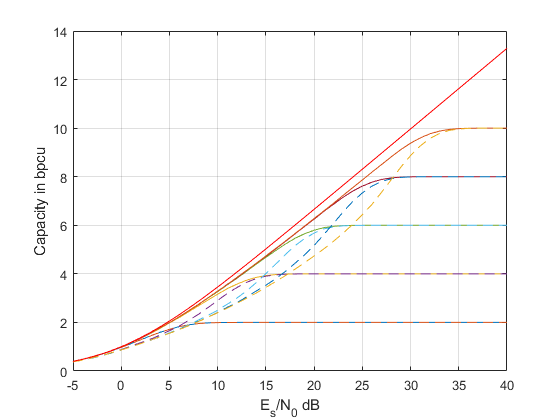

In [4]:
% Simulation parameters
Ns= 100000;                  % Number of Symbols 
Es_N0_dB =  (-5:40);

%loop for order M
for M = [4 16 64 256 1024];                     % Constellation Order
Constellation=qammod((0:M-1)',M,'bin');
BinaryTable=de2bi((0:M-1)','left-msb');
% Loop variable for SNR
% Monte carlo parameter
    
for snr=1:numel(Es_N0_dB)
    %generate M-QAM modulation
    
    s = randi([0 M-1],Ns,1);
    x = qammod(s, M,'bin');
    
    Es_N0=10^(Es_N0_dB(snr)/10);%normal
    sigx2=var(x);
    N0  = sigx2 /(Es_N0);
    
    %add noise
    noise_  = sqrt(N0/2 )*randn(length(x),1)+ ...
                1j*sqrt(N0/2 )*randn(length(x),1);
    sig_rx  =  x + noise_ ;
    
    %Compute Capacity
    %%Entropy
    Hx=log2(M);
    %%Conditionnal Entropy
    xref=repmat(Constellation,1,Ns);       %
    d2=-abs((repmat(sig_rx,1,M).'-xref)).^2/N0;
    PYX=exp(d2);
    PYx=exp(-abs((sig_rx-Constellation(s+1))).^2/N0);
    PxY=PYx./(sum(PYX)');
    HXY=-mean(log2(PxY'));
    ConstrainedCapacity(snr)=Hx-HXY;
    
    %Binary Capacity
    LLRs=log((1-BinaryTable')*PYX)-log(BinaryTable'*PYX);
    bits=de2bi(s,'left-msb')';
    BICMCapa(snr)=log2(M)*(1-1/numel(bits)*sum(log2(1+exp(-LLRs(:).*(1-2*bits(:))))));
end

plot(Es_N0_dB,ConstrainedCapacity);

hold on 
plot(Es_N0_dB,BICMCapa,'--');
end

plot(Es_N0_dB,log2(1+10.^(Es_N0_dB/10)),'r-')
%legend({'M=4','M=4','M=16','M=64','M=256','M=1024','Gaussian'},'Location','northwest')
xlabel('E_s/N_0 dB')
ylabel('Capacity in bpcu')
grid on

**En règle générale, pour les modulation linéaire, le mapping de Gray est optimal pour un système BICM (au sens où il permet de maximiser la capacité BICM).**